In [10]:
%env CUDA_LAUNCH_BLOCKING=1
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")


env: CUDA_LAUNCH_BLOCKING=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from robotodo.engines.isaac._kernel import Kernel

kernel = Kernel([
    "--/log/file=/tmp/todo-isaacsim.log",
    # "--/log/enableStandardStreamOutput=true",
    "--/app/enableStdoutOutput=true",
    # "--no-window",
    # TODO
    # "--/app/content/emptyStageOnStart=false",
    # "--/app/asyncRendering=true",
    # "--enable", "isaacsim.exp.full",
    "--/app/vulkan=",
], kit_path="isaacsim.exp.full.kit")
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'
[0.138s] [ext: omni.kit.async_engine-0.0.3] startup
[0.690s] [ext: omni.metrics.core-0.0.3] startup
[0.691s] [ext: omni.client.lib-1.1.0] startup
[0.755s] [ext: omni.blobkey-1.1.2] startup
[0.756s] [ext: omni.stats-1.0.1] startup
[0.758s] [ext: omni.datastore-0.0.0] startup
[0.818s] [ext: omni.client-1.3.0] startup
[0.881s] [ext: omni.ujitso.default-1.0.0] startup
[0.885s] [ext: omni.hsscclient-1.1.2] startup
[0.897s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.901s] [ext: omni.assets.plugins-0.0.0] startup
[0.905s] [ext: omni.gpu_foundation-0.0.0] startup
[0.967s] [ext: carb.windowing.plugin

2025-10-17T04:35:12Z s] [Error] [omni.gpu_foundation_factory.plugin] Start up failed. The default graphics plugin cannot be set!



|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3060          | Yes: 0 |     | 12288   MB | 10de      | 0          |
|     |                                  |        |     |            | 2504      | 3157457f.. |
|     |                                  |        |     |            | 1         |            |
|===============================================================================

2025-10-17T04:35:27Z [15,464ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


[16.276s] [ext: omni.kit.registry.nucleus-0.0.0] startup
[16.839s] app ready


2025-10-17T04:35:28Z [16,959ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-17T04:35:28Z [16,959ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-17T04:35:28Z [17,127ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


[20.042s] Isaac Sim Full App is loaded.


In [38]:
from robotodo.engines.isaac.builder import build_usd_scene, build_camera

scene = await build_usd_scene(_kernel=kernel)
camera = await build_camera(scene=scene)

In [13]:
from robotodo.engines.isaac.scene import Scene

scene = Scene(_kernel=kernel)

In [14]:
from robotodo.engines.isaac.sensors import Camera

camera = Camera("/World/Camera", scene=scene)

In [24]:
from robotodo.utils.pose import Pose

camera.pose = Pose.from_lookat([1, 1, 1], [0, 0, 0.5])

In [25]:
scene.viewer.clear_drawings()
scene.viewer.draw_pose(camera.pose)

In [26]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Simple_Room/simple_room.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

In [27]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


panda = await load_urdf(
    "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
    scene=scene, 
    path="/Panda",
    fix_root_link=True,
)


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
    path="/Mug",
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])



In [28]:
from robotodo.engines.isaac.builder import build_camera

camera = await build_camera(path="/Panda/ee_link/Camera7", scene=scene)

In [56]:
from robotodo.utils.pose import Pose

camera.pose = Pose.from_lookat([1.5, 1.5, 1.5], mug.pose.p)
scene.viewer.clear_drawings()
scene.viewer.draw_pose(camera.pose)

In [60]:
from robotodo.engines.isaac.entity import Entity

scene.viewer.clear_drawings()
scene.viewer.draw_pose(Entity("/Panda/panda_hand", scene=scene).pose)

In [ ]:
scene.viewer.clear_drawings()


2025-10-17T07:39:01Z [11,029,745ms] [Error] [gpu.foundation.plugin] Failed to read texture file https://ovextensionsprod.blob.core.windows.net/exts/kit/prod/107/shared/v2/./resources/e54ca61a9c60f0e88dc21c3699bb3fef.png or file is empty
2025-10-17T07:39:01Z [11,029,745ms] [Error] [omni.ui] Failed to upload UI Image 'https://ovextensionsprod.blob.core.windows.net/exts/kit/prod/107/shared/v2/./resources/e54ca61a9c60f0e88dc21c3699bb3fef.png'


: 

In [57]:
camera.pose

Pose(p=array([[1.49999993, 1.49999993, 1.5       ]]), q=array([[ 0.27984815,  0.11591689, -0.88047625,  0.36470518]]))

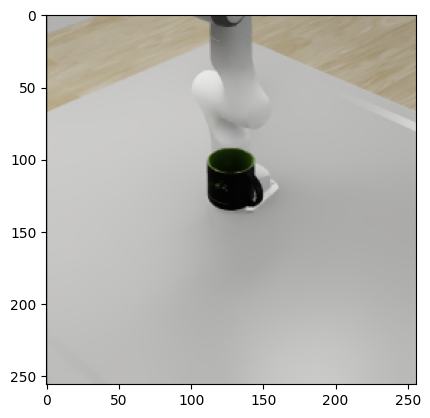

In [58]:
import matplotlib.pyplot as plt

plt.imshow((await camera.read_rgba())[0].cpu())

In [ ]:
scene.viewer.clear_drawings()
scene.viewer.draw_pose(camera.pose)

[65068.052s] [ext: omni.kit.registry.nucleus-0.0.0] startup


2025-10-17T03:45:23Z [65,098,882ms] [Error] [omni.ext.plugin] Can't pull extension: 'isaacsim.util.camera_inspector-1.0.15', it is already available locally.
2025-10-17T03:45:40Z [65,115,006ms] [Error] [omni.ext.plugin] Can't pull extension: 'isaacsim.sensors.camera.ui-0.2.0', it is already available locally.


[65126.730s] [ext: isaacsim.util.camera_inspector-1.0.15] startup


In [36]:
camera.pose

Pose(p=array([[0.79207506, 3.39911634, 2.02662325]]), q=array([[ 0.27534274, -0.64162228, -0.66473622,  0.26576864]]))

In [40]:
from robotodo.engines.isaac.entity import Entity

scene.viewer.clear_drawings()
scene.viewer.draw_pose(
    Entity("/Panda/ee_link", scene=scene).pose
)


In [30]:
camera.pose = camera.pose.inv()

In [45]:
scene.viewer.clear_drawings()
scene.viewer.draw_pose(camera.pose)

In [8]:
camera.pose.degrees

array([[ 1.80000000e+02,  1.27222187e-14, -4.50000027e+01]])

In [10]:
# TODO add as test

camera.pose = camera.pose
camera.pose

Pose(p=array([[ 8.79999772e-02, -4.98294810e-08,  8.25999975e-01]]), q=array([[ 9.23879524e-01,  3.82683454e-01, -1.66768926e-33,
         6.12323400e-17]]))

In [11]:
camera.pose = Pose(p=[.1, .3, .5]).rotated([.1, .2, .3])
camera.pose

Pose(p=array([[0.1       , 0.30000001, 0.5       ]]), q=array([[0.06407135, 0.09115755, 0.1534393 , 0.98185617]]))

In [12]:
scene.viewer.clear_drawings()
scene.viewer.draw_pose(camera.pose)
scene.viewer.draw_pose(Pose(p=[.1, .3, .5]).rotated([.1, .2, .3]))